# Text mining and search exam notebook: TextRank Comparison
Authors: Gaetano Chiriaco, Riccardo Porcedda, Gianmarco Russo

Here we create summaries with TextRank, so that we can use it as a benchmark to compare to our U-net model

In [1]:
import pandas as pd

df = pd.read_csv("drive/MyDrive/TM&S/data/abs_and_main.csv")
df.head()

,title,abstract,Main
0,Self-Organization of Associative Database and ...,An efficient method of self-organizing associ...,"Let a mapping f : X -+ Y be given. Here, X is..."
1,Bayesian Query Construction for Neural Network...,"If data collection is costly, there is much t...",In this paper we consider the situation wher...
2,"Neural Network Ensembles, Cross Validation, an...",Learning of continuous valued functions using...,It is well known that a combination of many ...
3,Pulsestream Synapses with Non-Volatile Analogu...,This paper presents results from the first us...,Fusion of the nuclei of hydrogen provides th...
4,Learning to Play the Game of Chess,"This paper presents NeuroChess, a program whi...","Throughout the last decades, the game of ches..."


In [2]:
!pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21714 sha256=759776b48969394e07d0a99397fb0be684ae3032a6c821e75e96bf775fa82565
  Stored in directory: /root/.cache/pip/wheels/5f/0d/0c/2062d8c1758b4b1a2e42b4a63e6660d9ec2ba9463cfee9eeab
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=2dc1d8987f30e40c8225ff499ee502253b36cb15a47b83abfbc7e04da568f7b6
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529

In [3]:
# Load Packages
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer

In [5]:
import nltk
nltk.download('punkt')
from tqdm.auto import tqdm

df["summary"] = ""

# Summarize using sumy TextRank
summarizer = TextRankSummarizer()

for i in tqdm(range(len(df))):
  parser = PlaintextParser.from_string(df["Main"][i],Tokenizer("english"))

  # Summarize with 5 sentences
  summary = summarizer(parser.document, 5)

  for sentence in summary:
    df["summary"][i] += str(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/6194 [00:00<?, ?it/s]

In [11]:
# Colab machine specs
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass retbleed
bogomips	: 4499.99
TLB s

In [6]:
!pip install rouge
from rouge import Rouge

# Compute ROUGE-2 Recall
def compute_rouge(hyps,refs):
  df = refs.merge(hyps,on="title")

  df["ROUGE-2"]=0.

  scores = Rouge(metrics=["rouge-2"]).get_scores(df["summary"], df["abstract"], avg=False)

  for i in range(len(scores)):
    df["ROUGE-2"][i]=scores[i]["rouge-2"].get("r")

  return df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
rouge_scores = compute_rouge(df[["title","summary"]], df[["title","abstract"]])

<ipython-input-6-2170e4e3fe1a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ROUGE-2"][i]=scores[i]["rouge-2"].get("r")


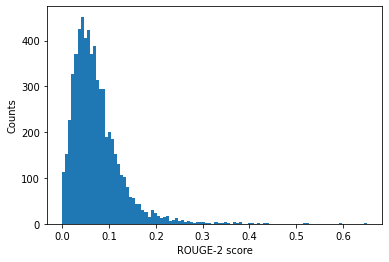

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Distribution of ROUGE-2 scores
plt.hist(rouge_scores["ROUGE-2"], bins=100)
plt.xlabel("ROUGE-2 score")
plt.ylabel("Counts")
plt.show()

In [9]:
np.mean(rouge_scores["ROUGE-2"])

0.07282478179859561

In [10]:
np.std(rouge_scores["ROUGE-2"])

0.052567454905960265